# ISLR Chapter 5

## Exercise 3

**We now review k-fold cross-validation.**

**3. a) Explain how k-fold cross-validation is implemented.**

K-fold cross-validation is implemented by taking the set of n observations and randomly splitting into k non-overlapping groups of roughly equal group-size. To compute the n-th $(n=1,2,...,K)$ MSE estimate, group k is used to as a validation set and the remainder as a training set. The test error is estimated by averaging the K resulting MSE estimates.

**3. b) What are the advantages and disadvantages of k-fold cross-validation relative to i) the validation set approach and ii) LOOCV?**

The validation set approach is conceptually simple and easily implemented as you are simply partitioning the existing training data into two sets. However, there are two drawbacks: (1.) the estimate of the test error rate can be highly variable depending on which observations are included in the training and validation sets. (2.) the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set since the training set has a relatively small sample size.

LOOCV is a special case of k-fold cross-validation with k = n. Thus, LOOCV is the most computationally intense method since the model must be fit n times. Also, LOOCV has higher variance, but lower bias, than k-fold CV.

## Exercise 4

**Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.**

If we suppose using some statistical learning method to make a prediction for the response Y for a particular value of the predictor X we might estimate the standard deviation of our prediction by using the bootstrap approach. 

Let $\hat{Y} = \hat{f}(X)$ denote the predictionf of $Y$ for the given $X$. The bootstrap approach works by repeatedly sampling observations (with replacement) from the original data set B times, for some large value of B, each time fitting a new model, $\hat{f}^*_1, \hat{f}^*_2, ..., \hat{f}^*_B$, and subsequently obtaining the RMSE of the estimates for all B models by computing $\sqrt{\sum^B_{b=1} (\hat{f}^*_b(X)-Y)^2}$

## Exercise 5

**In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.**

In [1]:
#No warnings for print version
options(warn=-1)

#First, load the necessary R-packages:
#install.packages("ISLR")

#call the packages you need
library("ISLR")

#Take a first look at the data - this time no need to clean the data
fix(Default)    # allows to edit the data
attach(Default) # eliminates the need of refering to a variable like Weekly$variable.

# Use summary function to produce a numerical summary for each variable
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

#### 5. a) Fit a logistic regression model that uses income and balance to predict default.

In [2]:
# Set seed
set.seed(1)

# Estimate a GLM model where "family=binomial" selects a logistic regression
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)

# Use summary function to print the results
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


#### 5. b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps: 

**1) Split the sample set into a training set and a validation set.**

**2) Fit a multiple logistic regression model using only the training observations.**

**3) Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.**

**4) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.**

In [6]:
# because we are going to need to use this approach several times latter on the exercise, we are going to build a function:

FiveB = function() {
    # 1) sample() function - takes a sample of the specified size from the elements of x using either with or without replacement.
    train = sample(dim(Default)[1], dim(Default)[1]/2)
    
    # 2)
    glm.fit = glm(default ~ income + balance, data = Default, family = binomial, 
        subset = train)
    
    # 3)
    glm.pred = rep("No", dim(Default)[1]/2)
    glm.probs = predict(glm.fit, Default[-train, ], type = "response")
    glm.pred[glm.probs > 0.5] = "Yes"
    
    # 4)
    return(mean(glm.pred != Default[-train, ]$default))
}
set.seed(1)
FiveB()

[1] 0.0254

**Answer:** There is a 2.54% test error rate from the validation set approach.

#### 5. c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [7]:
FiveB()
FiveB()
FiveB()

[1] 0.0274

[1] 0.0244

[1] 0.0244

**Answer:** The test error rates seem to average around 2.6%

#### 5. d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [10]:
set.seed(1)

# generate our training data
train = sample(dim(Default)[1], dim(Default)[1]/2)

# run regression on the training data subset
glm.fit = glm(default ~ income + balance + student, data = Default, family = binomial, 
    subset = train)

# create dataframe
glm.pred = rep("No", dim(Default)[1]/2)

# fill with our predictions
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.pred[glm.probs > 0.5] = "Yes"

# overall fraction of correct predictions
mean(glm.pred != Default[-train, ]$default)

[1] 0.026

**Answer:** The test error rate is 2.6% when adding the student dummy variable to our specification. When using the validation set approach, it doesn't appear that adding the dummy variable leads to a reduction in the test error rate.

## Exercise 6

**We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.**

In [11]:
# Use summary function to produce a numerical summary for each variable
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

#### 6. a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [12]:
# Same as in 5.a)

# Estimate a generalized linear regression model where the third input family is a description of the error distribution 
# and link function to be used in the model, supplied as the result of a call to a family function - here use binomial.
# Why binomial? Because our independent variable default takes two values.
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)

# Use summary function to print the results
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


#### 6. b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [13]:
boot.fn = function(data, index){
    return(coef(glm(default ~ income + balance, data = data, family = binomial, subset = index)))
}

#### 6. c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [14]:
#Install package boot if needed
#install.packages("boot")

#call the boot package
library(boot)

# Set seed
set.seed(1)

# The boot package provides extensive facilities for bootstrapping and related resampling methods. 
# You can bootstrap a single statistic (e.g. a median), or a vector (e.g., regression weights).
boot(Default, boot.fn, 100)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 100)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  8.556378e-03 4.122015e-01
t2*  2.080898e-05 -3.993598e-07 4.186088e-06
t3*  5.647103e-03 -4.116657e-06 2.226242e-04

#### 6. d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

**Answer:** We obtain a similar std. error estimate for the balance variable (up to 1 decimal) and for the income variable (up to unity). The std errors computed using the bootstrap approach are smaller.

## Exercise 8
**We will now perform cross-validation on a simulated data set.**

#### 8. a) Generate a simulated data set as follows. In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [15]:
# set seed for rnorm function
set.seed(1)

# rnorm simulates random variates having a specified normal distribution, here the standard one
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

**Answer:** 

n=100; 

p=2; 

model: $Y_i=X_i-2X_i^2+\epsilon_i$ 

$\epsilon_i \sim N(0,1), i=1,...,n=100$

#### 8 .b) Create a scatterplot of X against Y . Comment on what you find.

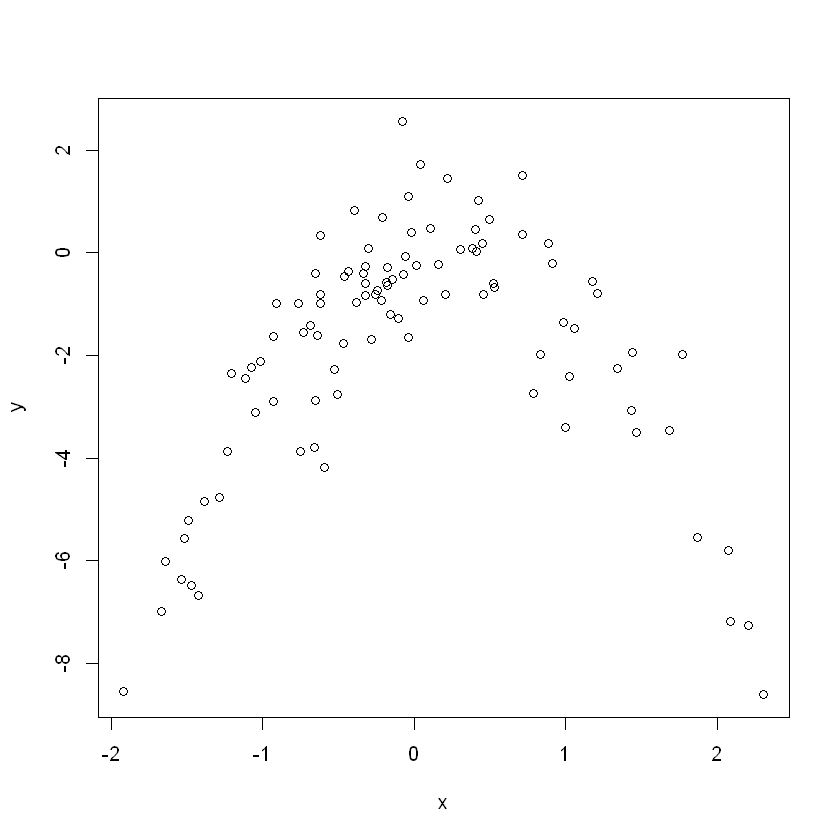

In [16]:
plot(x,y)

**Answer:** We can observe a quadratic relationship between $Y$ and $X$. $X$ ranges from about -2 to 2 while $Y$ ranges from about -8 to 2.

#### 8. c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [17]:
# call boot package
library(boot)

# create data frame with X and Y
Data = data.frame(x, y)

#set seed
set.seed(1)

#### 8. c. i) 

$Y = \beta_0 +\beta_1 X + \epsilon $

In [18]:
glm.fit = glm(y ~ x)

# cv.glm calculates the estimated K-fold cross-validation prediction error for generalized linear models. (K=n by default)
# Where delta is a vector of length two. The first component is the raw cross-validation estimate of prediction error. 
# The second component is the adjusted cross-validation estimate. The adjustment is designed to compensate for the bias.
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

#### 8. c. ii) 

$Y = \beta_0 +\beta_1 X + \beta_2 X^2 + \epsilon$

In [19]:
# poly function - https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/poly
glm.fit = glm(y ~ poly(x, 2, raw=TRUE))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

#### 8. c. iii) 

$Y = \beta_0 +\beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $

In [20]:
glm.fit = glm(y ~ poly(x, 3, raw=TRUE))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

#### 8. c. iv) 

$Y = \beta_0 +\beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon $

In [21]:
glm.fit = glm(y ~ poly(x, 4, raw=TRUE))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

#### 8. d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [22]:
set.seed(10)
# i.
glm.fit1 = glm(y ~ x)
cv.glm(Data, glm.fit1)$delta
# ii.
glm.fit2 = glm(y ~ poly(x, 2, raw=TRUE))
cv.glm(Data, glm.fit2)$delta
# iii.
glm.fit3 = glm(y ~ poly(x, 3, raw=TRUE))
cv.glm(Data, glm.fit3)$delta
# iv.
glm.fit4 = glm(y ~ poly(x, 4, raw=TRUE))
cv.glm(Data, glm.fit4)$delta

[1] 5.890979 5.888812

[1] 1.086596 1.086326

[1] 1.102585 1.102227

[1] 1.114772 1.114334

**Answer:** The results are exactly the same, because LOOCV will be the same since it evaluates n folds of a single observation.

#### 8. e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

**Answer:** The quadratic polynomial had the lowest LOOCV test error rate. This was expected because it matches the true form of $Y$.

#### 8. f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [23]:
summary(glm.fit1)


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3469  -0.9275   0.8028   1.5608   4.3974  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8185     0.2364  -7.692 1.14e-11 ***
x             0.2430     0.2479   0.981    0.329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 5.580018)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 546.84  on 98  degrees of freedom
AIC: 459.69

Number of Fisher Scoring iterations: 2


In [24]:
summary(glm.fit2)


Call:
glm(formula = y ~ poly(x, 2, raw = TRUE))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.89884  -0.53765   0.04135   0.61490   2.73607  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.09544    0.13345  -0.715    0.476    
poly(x, 2, raw = TRUE)1  0.89961    0.11300   7.961 3.24e-12 ***
poly(x, 2, raw = TRUE)2 -1.86665    0.09151 -20.399  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.06575)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.38  on 97  degrees of freedom
AIC: 295.11

Number of Fisher Scoring iterations: 2


In [25]:
summary(glm.fit3)


Call:
glm(formula = y ~ poly(x, 3, raw = TRUE))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.87250  -0.53881   0.02862   0.59383   2.74350  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.09865    0.13453  -0.733    0.465    
poly(x, 3, raw = TRUE)1  0.95551    0.22150   4.314  3.9e-05 ***
poly(x, 3, raw = TRUE)2 -1.85303    0.10296 -17.998  < 2e-16 ***
poly(x, 3, raw = TRUE)3 -0.02479    0.08435  -0.294    0.769    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.075883)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.28  on 96  degrees of freedom
AIC: 297.02

Number of Fisher Scoring iterations: 2


In [26]:
summary(glm.fit4)


Call:
glm(formula = y ~ poly(x, 4, raw = TRUE))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.13897    0.15973  -0.870 0.386455    
poly(x, 4, raw = TRUE)1  0.90980    0.24249   3.752 0.000302 ***
poly(x, 4, raw = TRUE)2 -1.72802    0.28379  -6.089  2.4e-08 ***
poly(x, 4, raw = TRUE)3  0.00715    0.10832   0.066 0.947510    
poly(x, 4, raw = TRUE)4 -0.03807    0.08049  -0.473 0.637291    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


**Answer:** p-values show statistical significance of linear and quadratic terms, which agrees with the CV results.